Text Sentence Similarity Results:
+----+---------------+---------------------+-----------------------+-----------+----------------+--------+
|    | Model         |   Cosine Similarity |   Pearson Correlation |   Latency |   TOPSIS Score |   Rank |
+====+===============+=====================+=======================+===========+================+========+
|  0 | Sentence-BERT |                0.9  |                  0.92 |       100 |       0.738796 |      1 |
+----+---------------+---------------------+-----------------------+-----------+----------------+--------+
|  2 | MPNet         |                0.89 |                  0.91 |       110 |       0.5      |      2 |
+----+---------------+---------------------+-----------------------+-----------+----------------+--------+
|  1 | USE           |                0.88 |                  0.9  |       120 |       0.261204 |      3 |
+----+---------------+---------------------+-----------------------+-----------+----------------+--------+


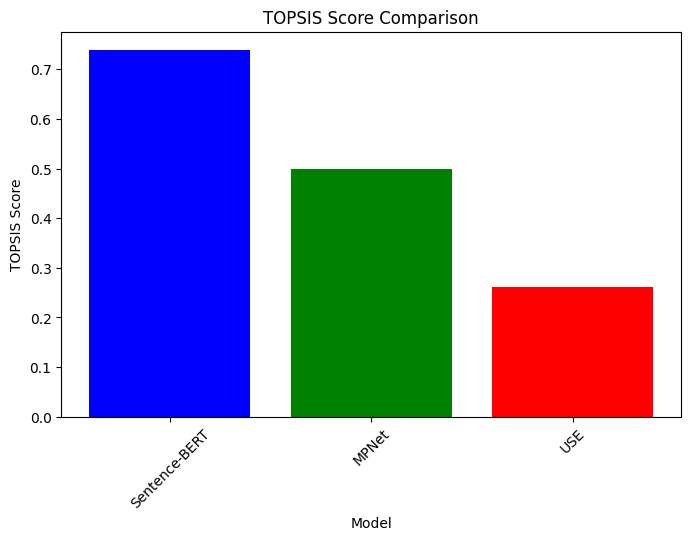

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate

def topsis(data, weights):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data.iloc[:, 1:])
    weighted_data = normalized_data * weights
    ideal_best = np.max(weighted_data, axis=0)
    ideal_worst = np.min(weighted_data, axis=0)
    distance_best = np.sqrt(np.sum((weighted_data - ideal_best) ** 2, axis=1))
    distance_worst = np.sqrt(np.sum((weighted_data - ideal_worst) ** 2, axis=1))
    topsis_score = distance_worst / (distance_best + distance_worst)
    data['TOPSIS Score'] = topsis_score
    data['Rank'] = data['TOPSIS Score'].rank(ascending=False)
    return data.sort_values(by='Rank')

data_similarity = pd.DataFrame({
    "Model": ["Sentence-BERT", "USE", "MPNet"],
    "Cosine Similarity": [0.90, 0.88, 0.89],
    "Pearson Correlation": [0.92, 0.90, 0.91],
    "Latency": [100, 120, 110]
})
weights_similarity = [0.4, 0.4, 0.2]
results_similarity = topsis(data_similarity, weights_similarity)

print("Text Sentence Similarity Results:")
print(tabulate(results_similarity, headers='keys', tablefmt='grid'))

results_similarity.to_csv('results_similarity.csv', index=False)

plt.figure(figsize=(8, 5))
plt.bar(results_similarity['Model'], results_similarity['TOPSIS Score'], color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('TOPSIS Score')
plt.title('TOPSIS Score Comparison')
plt.xticks(rotation=45)
plt.show()
